<a href="https://colab.research.google.com/github/VivexxYadav/yadavpaints/blob/main/Paint_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!git clone https://github.com/VivexxYadav/yadavpaints.git

Cloning into 'yadavpaints'...
fatal: could not read Username for 'https://github.com': No such device or address


#Importing dataset

In [ ]:
from google.colab import files  # Only for Google Colab

uploaded = files.upload()

import pandas as pd
import io

Saving duplinncate.csv to duplinncate.csv


# 1. Load your dataset

In [ ]:
df = pd.read_csv("duplinncate.csv")

# 2. Preprocess the data
(Convert 'Month' to numeric)


In [ ]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['Month'] = df['Month'].map(month_mapping)

# Label encode categorical variables


In [ ]:
categorical_cols = ['Paint Type', 'Area Type', 'Weather', 'Season']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [ ]:
le_dict

{'Paint Type': LabelEncoder(),
 'Area Type': LabelEncoder(),
 'Weather': LabelEncoder(),
 'Season': LabelEncoder()}

In [ ]:
for col, encoder in le_dict.items():
    print(f"\nColumn: {col}")
    print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


Column: Paint Type
{'Distemper': np.int64(0), 'Exterior Emulsion': np.int64(1), 'Interior Emulsion': np.int64(2), 'Primer': np.int64(3)}

Column: Area Type
{'Rural': np.int64(0), 'Urban': np.int64(1)}

Column: Weather
{'Cold': np.int64(0), 'Hot': np.int64(1), 'Humid': np.int64(2), 'Rainy': np.int64(3), 'Sunny': np.int64(4)}

Column: Season
{'Festive': np.int64(0), 'Normal': np.int64(1), 'Wedding': np.int64(2)}


# 3. Define features and target


In [ ]:
X = df[['Month', 'Year', 'Paint Type', 'Area Type', 'Weather', 'Season']]
y = df['Quantity Sold (Litres)']

# 4. Split data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize models


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# 6. Train & evaluate models


In [ ]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append({'Model': name, 'MSE': mse, 'R2 Score': r2})

# 7. Display results


In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

               Model           MSE  R2 Score
0  Linear Regression  20689.901077  0.446968
1      Decision Tree   3928.948052  0.894981
2      Random Forest   2710.531655  0.927549
3                KNN  13819.393766  0.630614
4            XGBoost   4346.022461  0.883833


# 8. Visualize performance


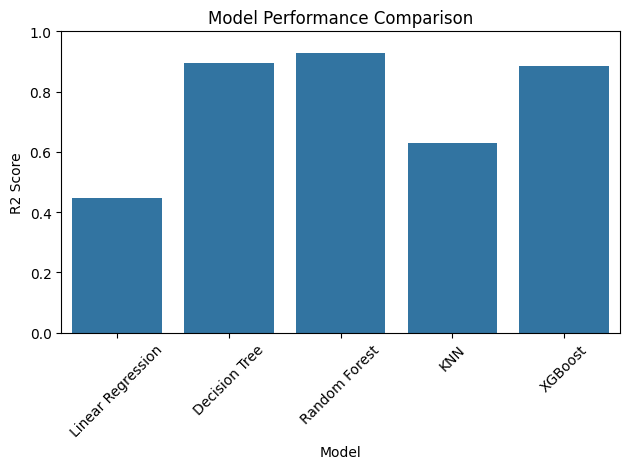

In [ ]:
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Predict for future (example)


In [ ]:
future_data = pd.DataFrame({
    'Month': [9],
    'Year': [2025],
    'Paint Type': [le_dict['Paint Type'].transform(['Interior Emulsion'])[0]],
    'Area Type': [le_dict['Area Type'].transform(['Urban'])[0]],
    'Weather': [le_dict['Weather'].transform(['Humid'])[0]],
    'Season': [le_dict['Season'].transform(['Normal'])[0]],
})

In [ ]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X, y)
future_prediction = best_model.predict(future_data)
print("Predicted sales for given input (September 2025, Primer, Urban):", future_prediction[0])

Predicted sales for given input (September 2025, Primer, Urban): 979.47


In [ ]:
future_months = []
for month in range(1, 13):
    for paint in le_dict['Paint Type'].classes_:
        for area in le_dict['Area Type'].classes_:
            for season in ['Normal', 'Festive', 'Wedding']:
                future_months.append({
                    'Month': month,
                    'Year': 2025,
                    'Paint Type': le_dict['Paint Type'].transform([paint])[0],
                    'Area Type': le_dict['Area Type'].transform([area])[0],
                    'Weather': le_dict['Weather'].transform(['Cold'])[0],  # Adjust based on month
                    'Season': le_dict['Season'].transform([season])[0],
                })

future_df = pd.DataFrame(future_months)
future_df['Predicted Sales'] = best_model.predict(future_df)

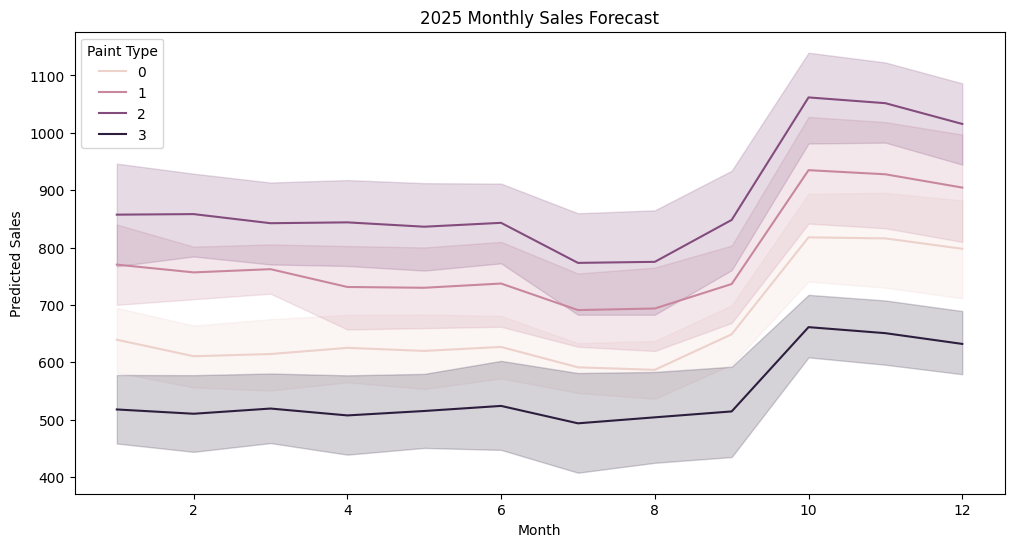

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=future_df, x='Month', y='Predicted Sales', hue='Paint Type')
plt.title("2025 Monthly Sales Forecast")
plt.show()

In [ ]:
future_df.to_csv("2025_predictions.csv", index=False)